In [1]:
from Plot_Functions_TL import CollectData, CollectData_Prod_CoCaBO

import numpy as np
import pandas as pd
import json



from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold

import scipy
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import NonlinearConstraint


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)
from sklearn.model_selection import train_test_split


import GPy
import GPyOpt
from numpy.random import seed


In [2]:
root_path = './'
carbon_source_filepath = './'

In [3]:
Stock_solid = pd.read_excel(carbon_source_filepath+'CarbonSourceInfo.xlsx', 'Stocks_solid')
Stock_liquid = pd.read_excel(carbon_source_filepath+'CarbonSourceInfo.xlsx', 'Stocks_liquid')

Carbon_Names = Stock_solid['Carbon Source'].values.tolist()
Carbon_Names.append(Stock_liquid['Carbon Source'][1])
Carbon_Names.append(Stock_liquid['Carbon Source'][2])

In [4]:
Molecule_list = ['HSA'] 

### Collect Round Data

In [5]:
Design, Design_all, Result, Titer_all, SP_all, OD_prod_all, OD_og_all = CollectData(
    root_path, carbon_source_filepath, Molecule_list,6)


Design_b, Design_all_b, Result_b, Titer_all_b, SP_all_b, OD_prod_all_b, OD_og_all_b, res_bench_b, res_bench_all_b = CollectData_Prod_CoCaBO(
root_path, carbon_source_filepath, Molecule_list,[6])



Limits = dict()
for m in Molecule_list:
    Limits[m] = {}
    

Limits['HSA'] ['bmmy_lb_sp'] = 7 * [ 3.7]
Limits['HSA'] ['bmmy_ub_sp'] = 7 * [4.2]


Limits['HSA'] ['bmmy_lb_titer'] = 7 * [ 40]
Limits['HSA'] ['bmmy_ub_titer'] = 7 * [ 47]


(11, 9)
(9,)
(11, 9)
(11, 9)
(11, 9)
(11, 9)
(11, 9)


In [6]:
N_round = 6
Molecule_Name = 'HSA'

###  Specific productivity in different rounds

0
1
2
3
4
5


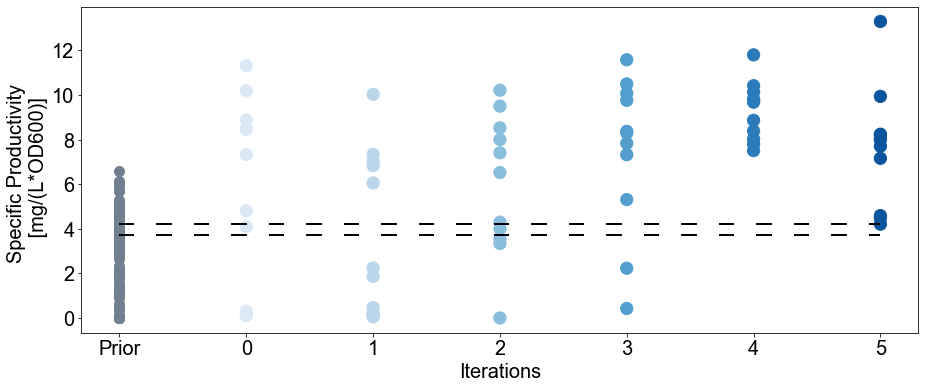

In [8]:

bmmy_lb_sp = Limits[Molecule_Name] ['bmmy_lb_sp'] 
bmmy_ub_sp = Limits[Molecule_Name] ['bmmy_ub_sp'] 

count_high = []
count_range = []

bmmy_lb_titer = Limits[Molecule_Name] ['bmmy_lb_titer'] 
bmmy_ub_titer = Limits[Molecule_Name] ['bmmy_ub_titer'] 

x = np.arange(-1,6).tolist()
color_list = ['navy','purple','gold','rosybrown','slategray', 'crimson']

params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'}
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (15,6)
fig, axs = plt.subplots(1, 1, gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

cmap = matplotlib.cm.get_cmap('Blues')

for nr in range(1):
    titer_r = Titer_all_b[Molecule_Name] 
    SP_r = SP_all_b[Molecule_Name]
    round_id = [nr-1] * len(SP_r) 
    
    axs.scatter(round_id , SP_r, s= 100, c = 'slategrey')
    
for nr in range(N_round):
    print(nr)
    titer_r = Result[Molecule_Name][nr][:-19, 0].tolist() 
    SP_r = Result[Molecule_Name][nr][:-19,1].tolist() 
    if Molecule_Name == 'RBDJ' and nr == 5:
        titer_r = titer_r[16:]
        SP_r = SP_r[16:]
        
    temp = 0
    temp2 = 0
    for k in range(len(SP_r)):
        if SP_r[k]>= bmmy_ub_sp[0]:
            temp = temp+1
            
        if SP_r[k]< bmmy_ub_sp[0] and SP_r[k]> bmmy_lb_sp[0]:
            temp2 = temp2+1
            
    count_high.append(temp)
    count_range.append(temp2)
    
    round_id = [nr] * len(SP_r) 
    axs.scatter(round_id , SP_r, s= 150, c = [cmap((nr+1)/7)]*len(SP_r) )
    axs.plot(x, bmmy_lb_sp, linestyle= (0, (10, 15)), color = 'k')
    axs.plot(x, bmmy_ub_sp, linestyle= (0, (10, 15)), color = 'k')
    axs.set_xticks(np.arange(-1, 6))
    axs.set_xticklabels(['Prior'] + np.arange(0, 6).tolist(),**hfont)
    axs.set_yticks(np.arange(0, 14,2))
    axs.set_yticklabels(np.arange(0,14, 2),**hfont)
    axs.set_xlabel('Iterations', **hfont)
    axs.set_ylabel('Specific Productivity \n [mg/(L*OD600)]', **hfont)
    
    
plt.savefig('./Plots/'+ Molecule_Name + '_TL_SP_OverRounds.png', dpi = 300,bbox_inches='tight')